In [12]:
import numpy as np
import pandas as pd
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [13]:
train_path=r"C:\Users\kunap\Desktop\ANN_Coursework\X-rays\train"
valid_path=r"C:\Users\kunap\Desktop\ANN_Coursework\X-rays\val"
test_path=r"C:\Users\kunap\Desktop\ANN_Coursework\X-rays\test"

# CNN Model

In [3]:
img_height = 150
img_width = 150
batch_size = 16 


model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'relu', units = 64))

model.add(Dense(units = 3 , activation = 'softmax'))
model.compile(optimizer = "Adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        1

# Applying VGG19

In [9]:
def vgg19_model(train,valid, epochs_count, image_size):
    start_time = time.time()
    vgg19_weights = VGG19(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
    for layers in vgg19_weights.layers:
        layers.trainable = False
    model_vgg19 = Sequential()
    model_vgg19.add(vgg19_weights)
    model_vgg19.add(Flatten())
    model_vgg19.add(Dense(3,activation='softmax'))
    model_vgg19.summary()
    model_vgg19.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model_vgg19.fit(x=train, validation_data = valid,validation_steps=len(valid)//32,steps_per_epoch=len(train)//32,epochs=epochs_count)
    exe = (time.time() - start_time)
    print("Execution time", exe)
    return history, model_vgg19

In [16]:
# import tensorflow as tf
# train_generator=image.ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)  \
# .flow_from_directory(directory=train_path, target_size=(150,150),classes=["Covid-19","No_findings","Pneumonia"],batch_size=10)

# valid_generator=image.ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)  \
# .flow_from_directory(directory=valid_path, target_size=(150,150),classes=["Covid-19","No_findings","Pneumonia"],batch_size=10)

# test_generator=image.ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)  \
# .flow_from_directory(directory=test_path, target_size=(150,150),classes=["Covid-19","No_findings","Pneumonia"],batch_size=10)

Found 760 images belonging to 3 classes.
Found 95 images belonging to 3 classes.
Found 95 images belonging to 3 classes.


In [14]:
# Image Augmentation

train_datagen = image.ImageDataGenerator(
                                rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
valid_datagen = image.ImageDataGenerator(rescale=1./255)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [15]:
# Generating the batches of Augmented Data

train_generator = train_datagen.flow_from_directory(train_path,target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='categorical',classes=['Covid-19', 'No_findings', 'Pneumonia'])

valid_generator = valid_datagen.flow_from_directory(valid_path,target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='categorical', classes=['Covid-19', 'No_findings', 'Pneumonia'], shuffle=False)

test_generator = test_datagen.flow_from_directory(test_path,target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='categorical',shuffle=False)


Found 760 images belonging to 3 classes.
Found 95 images belonging to 3 classes.
Found 95 images belonging to 3 classes.


In [16]:
train_generator.class_indices

{'Covid-19': 0, 'No_findings': 1, 'Pneumonia': 2}

In [5]:
import tensorflow as tf
from tensorflow.keras import callbacks
import time
best = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min',patience=3)
start_time = time.time()
hist = model.fit_generator(
                train_generator,
                steps_per_epoch=8,
                epochs=20,
                callbacks=[best],
                validation_data=valid_generator,
                validation_steps=2)
exe = (time.time() - start_time)
print("Execution time", exe)

NameError: name 'model' is not defined

In [10]:
import time
from tensorflow.keras.applications import  VGG19
hist,model = vgg19_model(train_generator,valid_generator,15,150)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 24579     
Total params: 20,048,963
Trainable params: 24,579
Non-trainable params: 20,024,384
_________________________________________________________________
Train for 24 steps, validate for 3 steps
Epoch 1/15
24/24 [==============================] - 131s 5s/step - loss: 1.0467 - accuracy: 0.4645 - val_loss: 0.8695 - val_accuracy: 0.4842
Epoch 2/15
24/24 [==============================] - 137s 6s/step - loss: 0.7581 - accuracy: 0.6474 - val_loss: 0.6239 - val_accuracy: 0.7579
Epoch 3/15
24/24 [==========================

In [17]:
import glob
import cv2
import os
SIZE = 150
train_images = []
train_labels = []
for directory_path in glob.glob(r"C:\Users\kunap\Desktop\ANN_Coursework\X-rays\train\*"):
    label = directory_path.split('\\')[-1]
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
    
train_images = np.array(train_images)
train_labels = np.array(train_labels)


In [18]:
val_images = []
val_labels = []
for directory_path in glob.glob(r"C:\Users\kunap\Desktop\ANN_Coursework\X-rays\val\*"):
    label = directory_path.split('\\')[-1]
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        val_images.append(img)
        val_labels.append(label)
    
val_images = np.array(val_images)
val_labels = np.array(val_labels)
    

In [19]:
test_images = []
test_labels = []
for directory_path in glob.glob(r"C:\Users\kunap\Desktop\ANN_Coursework\X-rays\test\*"):
    label = directory_path.split('\\')[-1]
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)
    
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [22]:
from sklearn import preprocessing
from tensorflow.keras.applications import  VGG19
image_size=150

le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

x_train, x_test = x_train/255.0, x_test/255.0


vgg19_model = VGG19(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
for layers in vgg19_model.layers:
    layers.trainable = False

vgg19_model.summary()
feature_extractor=vgg19_model.predict(x_train)
features = feature_extractor.reshape(feature_extractor.shape[0],-1)
X_for_train = features


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [23]:
import time
start_time = time.time()
# import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# model = xgb.XGBClassifier()
model.fit(X_for_train, y_train)

X_test_feature = vgg19_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
prediction = model.predict(X_test_features)
prediction = le.inverse_transform(prediction)
exe = (time.time() - start_time)
print("Execution time", exe)

Execution time 16.5857253074646


In [11]:
cr = classification_report(test_labels, prediction)
print(cr)

              precision    recall  f1-score   support

    Covid-19       1.00      1.00      1.00        25
 No_findings       0.80      0.91      0.85        35
   Pneumonia       0.90      0.77      0.83        35

    accuracy                           0.88        95
   macro avg       0.90      0.90      0.89        95
weighted avg       0.89      0.88      0.88        95



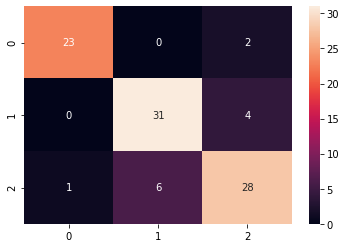

In [17]:
import seaborn as sns
cm=confusion_matrix(test_labels, prediction)
sns.heatmap(cm,annot=True)

In [8]:
predictions = model.predict(x=test_generator, verbose=0)

In [9]:

cr = classification_report(y_true=test_generator.classes, y_pred=np.argmax(predictions, axis=1))
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        25
           1       0.66      0.89      0.76        35
           2       0.69      0.51      0.59        35

    accuracy                           0.71        95
   macro avg       0.72      0.71      0.70        95
weighted avg       0.71      0.71      0.70        95



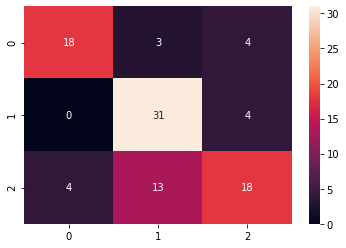

In [12]:
import seaborn as sns
cm = confusion_matrix(y_true=test_generator.classes, y_pred=np.argmax(predictions, axis=1))
sns.heatmap(cm,annot=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


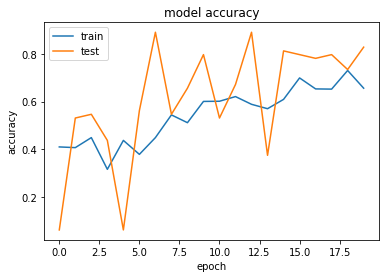

In [10]:

print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


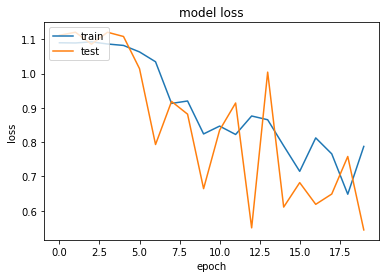

In [11]:

print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
print(train_path)
train_path.split("\\")[-1]

C:\Users\kunap\Desktop\ANN_Coursework\X-rays\train


'train'

In [19]:
import time
start_time = time.time()
image_size = 150
incep = InceptionV3(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
for layers in incep.layers:
    layers.trainable 
incep_mod = tensorflow.keras.Sequential()
incep_mod.add(incep)
incep_mod.add(Flatten())
incep_mod.add(Dense(3,activation='softmax'))
incep_mod.summary()
incep_mod.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_incep_mod = incep_mod.fit(x=train_generator, validation_data = valid_generator,epochs=10,steps_per_epoch=len(train_generator)//32,
                             validation_steps=len(valid_generator)//32)  #,callbacks = [callback]
elapsed_time = (time.time() - start_time)

TypeError: __call__() missing 1 required positional argument: 'inputs'